# KNearest Neighbor

- K Nearest Neighbor is one of the fundamental algorithms in machine learning. 
- Machine learning models use a set of input values to predict output values. 
- KNN is one of the simplest forms of machine learning algorithms mostly used for classification.
- It classifies the data point on how its neighbor is classified.

- KNN classifies the new data points based on the similarity measure of the earlier stored data points.
- For example, if we have a dataset of tomatoes and bananas. KNN will store similar measures like shape and color. 
- When a new object comes it will check its similarity with the color (red or yellow) and shape

- K in KNN represents the number of the nearest neighbors we used to classify new data points.

In [26]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [27]:
# importing the dataset
dataset = pd.read_csv(r'C://Users//TANSOLAN//Documents//Data//diabetes.csv')

In [28]:
# seeing the sample of the complete dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# replacing the value with the mean value of the columns
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for coloumn in non_zero:
    dataset[coloumn] = dataset[coloumn].replace(0,np.NaN)
    mean = int(dataset[coloumn].mean(skipna = True))
    dataset[coloumn] = dataset[coloumn].replace(np.NaN, mean)
    print(dataset[coloumn])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


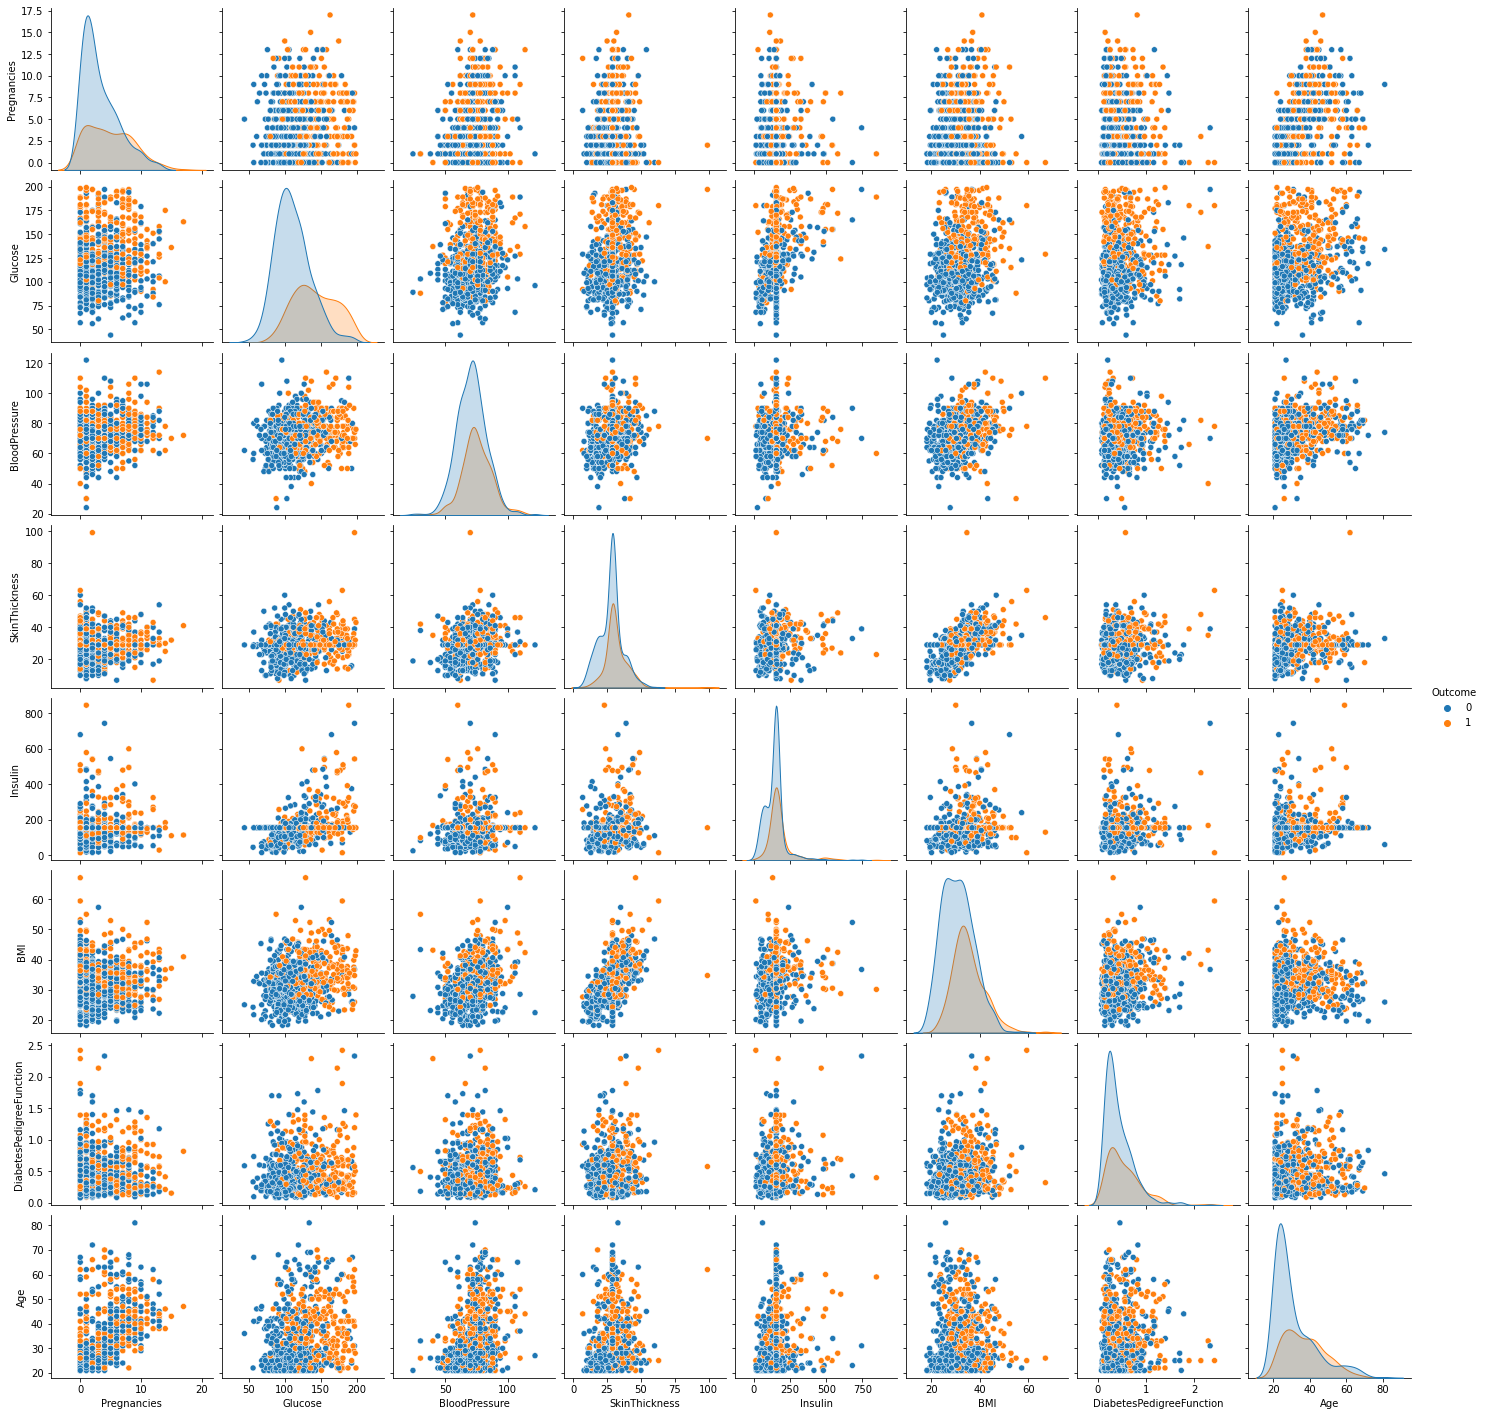

In [11]:
# checking the pairplot for each columns in the dataset
import seaborn as sns
p=sns.pairplot(dataset, hue = 'Outcome')


In [15]:
# spliting the dataset into train and test 
X =dataset.iloc[:,0:8]
y =dataset.iloc[:,8]
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)

**Standard Scalar**
- StandardScaler performs the task of Standardization.
- Usually a dataset contains variables that are different in scale. 
- For example, the dataset will contain an insulin column with values on scale 20–70 and Glucose column with values on scale 80–200. 
- As these two columns are different in scale, they are standardized to have a common scale while building a machine learning model.

In [16]:
#feature Scaling by using the transform
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

- Choosing the right value of K is called parameter tuning and it’s necessary for better results. By choosing the value of K we square root the total number of data points available in the dataset.

     - K = sqrt (total number of data points).

     - Odd value of K is always selected to avoid confusion between 2 classes.

In [17]:
# getting the k value
import math
math.sqrt(len(y_test))

12.409673645990857

***KNN WORKS***
- a. We have properly labeled data. For example, if we are predicting someone is having diabetes or not the final label can be 1 or 0. It cannot be NaN or -1.

- b. Data is noise-free. For the diabetes data set we cannot have a Glucose level as 0 or 10000. It’s practically impossible.

- c. Small dataset.

In [18]:
# computing the euclidean distance 
classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [19]:
# computing the y_prediction value
y_pred =  classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [20]:
# creating the Confusion Matrix 
cm= confusion_matrix(y_test,y_pred)
cm

array([[86, 14],
       [24, 30]], dtype=int64)

In [21]:
# calculating the f1_score
print(f1_score(y_test,y_pred))


0.6122448979591836


In [22]:
# calculating the Accuracy 
print(accuracy_score(y_test,y_pred))

0.7532467532467533


C:\Users\TANSOLAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\TANSOLAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


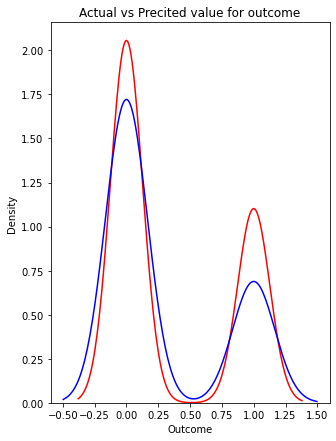

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(dataset['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()